### **Statistic Week ( Python ka Chilla 1.0 )**

- Terms of statistics:
  
  - AVERAGE
  - MAXIMUM
  - MINIMUM
  - PERCENTAGE
  - LIKELIHOOD
  - VARIENCE
  - T-TEST
  - ANOVA

- Types of Data:
  
  - CROSS SECTIONAL
    - Data collected at one point
    - e.g: how many people have watched a video today
  - TIME SERIES
    - Data collected at different points
    - e.g: how many people have watched a video since 2021 to 2023
  - UNIVARIATE
    - Data contains a single variable to measure entity
    - e.g: if you are eating food how much your weight is increasing
  - MULTI-VARIATE
    - Data contains > 2 variables to measure something
    - e.g: if you are eating food and also drinking water how much your weight is increasing

- Types of Variable:
  - Categorical (Nominal) Variable :
    - Binomial
      - True/False
    - Multinomial
      - Multiple Choices
    - Ordinal
      - Data ranked or ordered
  - Continuous Variable :
    - Ratio Data
      - we compare with ratio
      - Data have natural zero
    - Interval Variables
      - ordered and characterized data

# Exploratory Data Analysis

-   Three important steps to keep in mind
    -   Understand the data
    -   Clean the data
    -   Find a relationship between data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ks = pd.read_csv('./kashit.csv')

In [3]:
ks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
 8   embarked     889 non-null    object 
 9   class        891 non-null    object 
 10  who          891 non-null    object 
 11  adult_male   891 non-null    bool   
 12  deck         203 non-null    object 
 13  embark_town  889 non-null    object 
 14  alive        891 non-null    object 
 15  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(7)
memory usage: 99.3+ KB


In [4]:
ks.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# this will give us the number of (rows, columns)
ks.shape

(891, 16)

In [6]:
# to check unique values
ks.nunique()

Unnamed: 0     891
survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [7]:
# to check column names
ks.columns

Index(['Unnamed: 0', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [8]:
# to check unique values in a particular column
ks['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [9]:
# 12:43 assignment (solution)
# how to get unique values of more than 1 column 
pd.unique(ks[['who','sex']].values.ravel())

array(['man', 'male', 'woman', 'female', 'child'], dtype=object)

# Cleaning and filtering the data

In [10]:
# find the missing values inside
ks.isnull().sum()

Unnamed: 0       0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
# as 'deck' column has the most missing values so we drop/remove the whole column (cleaning data step1)
kashti_cleandata = ks.drop(columns=['deck'])
kashti_cleandata.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [12]:
kashti_cleandata.isnull().sum()

Unnamed: 0       0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
kashti_cleandata.shape

(891, 15)

In [14]:
# we drop the remaining null value rows and update our variable (cleaning data step2)
kashti_cleandata = kashti_cleandata.dropna()
kashti_cleandata

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
886,886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
889,889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [15]:
kashti_cleandata.isnull().sum()

Unnamed: 0     0
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [16]:
kashti_cleandata['who'].value_counts()

man      413
woman    216
child     83
Name: who, dtype: int64

### Comparing before and after cleaning data

In [17]:
# before cleaning
ks.describe()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
# after cleaning
kashti_cleandata.describe()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,447.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,221.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,444.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,676.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,890.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [19]:
kashti_cleandata.columns

Index(['Unnamed: 0', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'who', 'adult_male', 'embark_town',
       'alive', 'alone'],
      dtype='object')

<AxesSubplot: xlabel='sex', ylabel='age'>

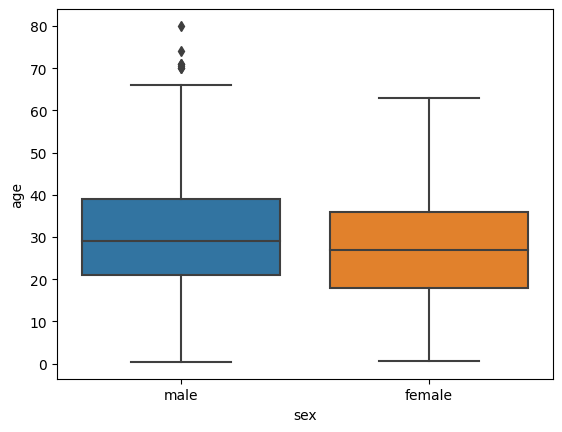

In [20]:
sns.boxplot(x='sex', y='age', data=kashti_cleandata)

<AxesSubplot: ylabel='age'>

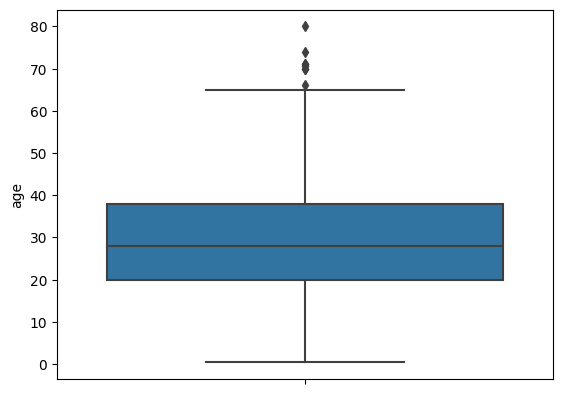

In [21]:
sns.boxplot(y='age', data=kashti_cleandata)

C:\Users\stech\AppData\Local\Temp\ipykernel_7880\419613453.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(kashti_cleandata['age'])


<AxesSubplot: xlabel='age', ylabel='Density'>

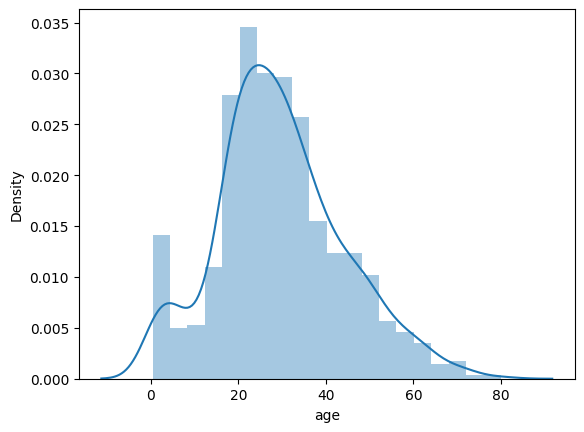

In [22]:
sns.distplot(kashti_cleandata['age'])

In [23]:
kashti_cleandata['age'].mean()

29.64209269662921

### how to remove outliers of a graph

In [24]:
# below method will convert the column into boolean values
# kashti_cleandata['age'] =  kashti_cleandata['age'] < 68
# kashti_cleandata['age'].mean()

In [25]:
kashti_cleandata.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [26]:
kashti_cleandata = kashti_cleandata[kashti_cleandata['age'] < 68]

In [27]:
kashti_cleandata.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [28]:
# we have cleaned the rows that contained (age > 68)
kashti_cleandata.shape

(705, 15)

<AxesSubplot: ylabel='age'>

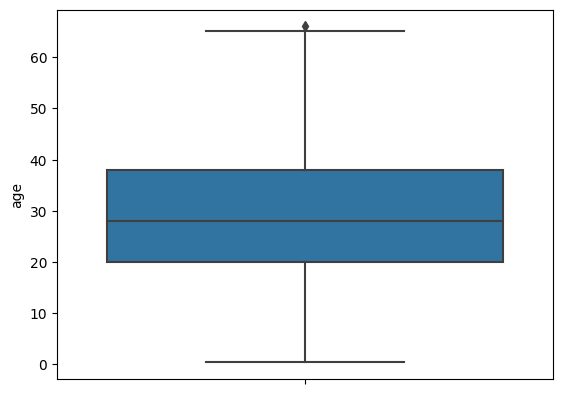

In [29]:
# outliers are removed in below graph
sns.boxplot(y='age', data=kashti_cleandata)

In [30]:
kashti_cleandata.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [31]:
kashti_cleandata.shape

(705, 15)

<AxesSubplot: >

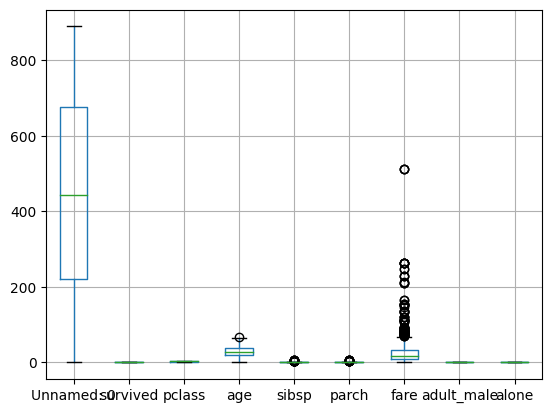

In [32]:
kashti_cleandata.boxplot()

<AxesSubplot: >

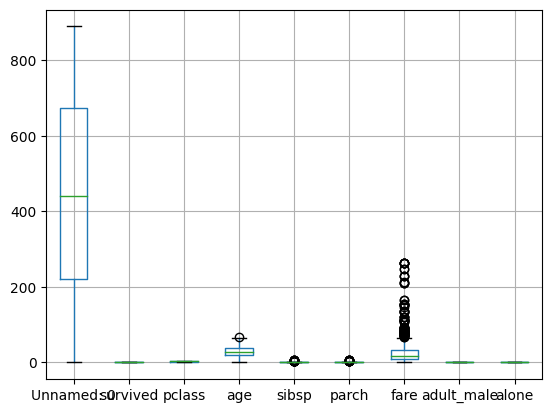

In [33]:
# we see that only single person has fare 500 so we can remove the unwanted fare
kashti_cleandata = kashti_cleandata[kashti_cleandata['fare'] < 300]
kashti_cleandata.boxplot()

C:\Users\stech\AppData\Local\Temp\ipykernel_7880\627674962.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(kashti_cleandata['fare'])


<AxesSubplot: xlabel='fare', ylabel='Density'>

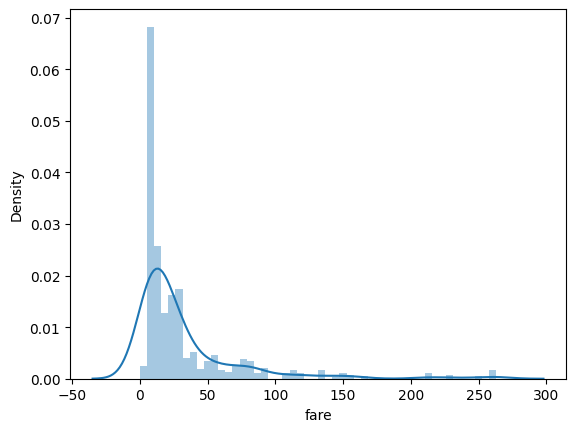

In [34]:
sns.distplot(kashti_cleandata['fare'])

- dispersion of the fare parameter is alot and we can actually handle it

In [35]:
# log transformation
kashti_cleandata['fare_log'] = np.log(kashti_cleandata['fare'])
kashti_cleandata.head()

c:\Users\stech\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,fare_log
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1.981001
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,4.266662
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,2.070022
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,3.972177
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,2.085672


### Difference between fare and fare_log boxplot

<AxesSubplot: ylabel='fare'>

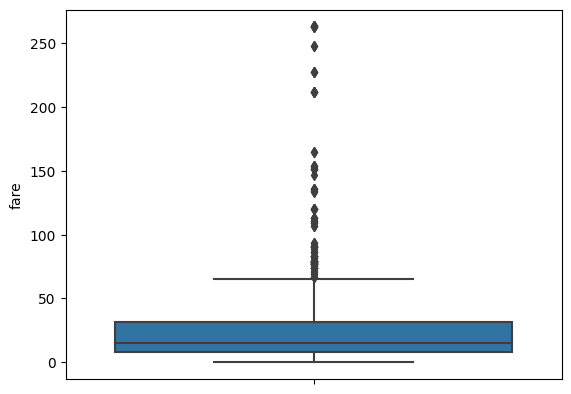

In [36]:
sns.boxplot(y='fare', data=kashti_cleandata)

<AxesSubplot: ylabel='fare_log'>

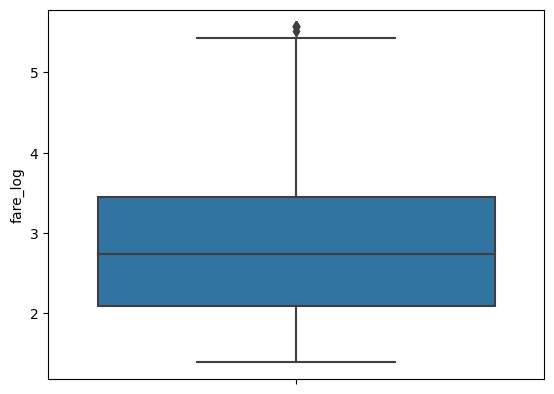

In [37]:
sns.boxplot(y='fare_log', data=kashti_cleandata)

<AxesSubplot: >

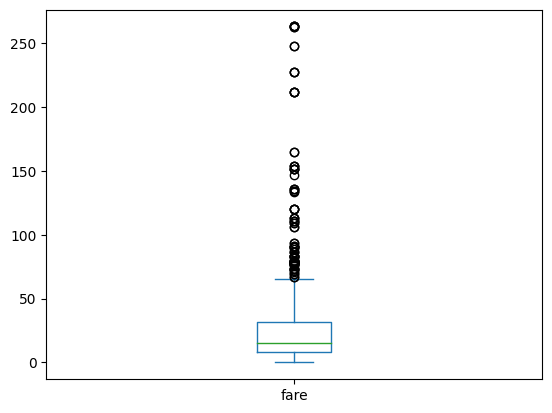

In [38]:
kashti_cleandata['fare'].plot.box()

<AxesSubplot: >

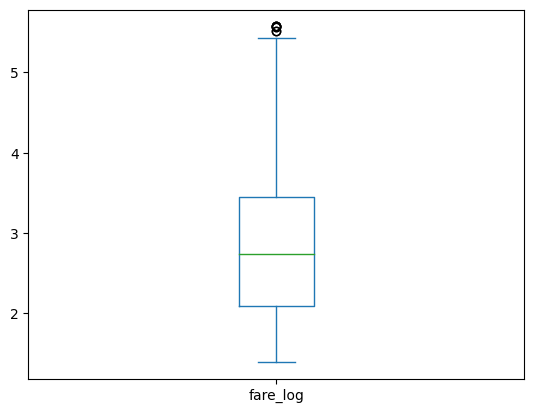

In [39]:
kashti_cleandata['fare_log'].plot.box()

<AxesSubplot: >

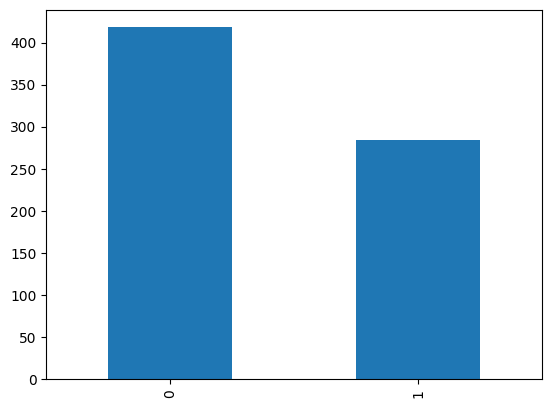

In [40]:
# using pandas how we can create plot of single column
pd.value_counts(kashti_cleandata['survived']).plot.bar()

<AxesSubplot: >

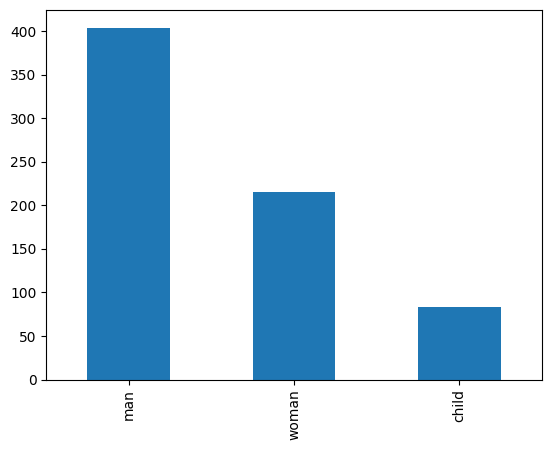

In [41]:
pd.value_counts(kashti_cleandata['who']).plot.bar()

In [42]:
kashti_cleandata.groupby(['sex', 'class']).mean()

C:\Users\stech\AppData\Local\Temp\ipykernel_7880\4198421734.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  kashti_cleandata.groupby(['sex', 'class']).mean()


Unnamed: 0  survived  pclass        age     sibsp     parch  \
sex    class                                                                 
female First   480.743902  0.963415     1.0  34.231707  0.560976  0.512195   
       Second  441.905405  0.918919     2.0  28.722973  0.500000  0.621622   
       Third   405.500000  0.460784     3.0  21.750000  0.823529  0.950980   
male   First   443.810526  0.389474     1.0  40.067579  0.389474  0.336842   
       Second  447.061224  0.153061     2.0  30.340102  0.377551  0.244898   
       Third   453.984064  0.151394     3.0  26.143108  0.494024  0.258964   

                     fare  adult_male     alone  fare_log  
sex    class                                               
female First   103.696393    0.000000  0.353659  4.461026  
       Second   21.951070    0.000000  0.405405  2.985791  
       Third    15.875369    0.000000  0.372549  2.617667  
male   First    62.901096    0.968421  0.526316       NaN  
       Second   21.221429    0.908163  0.632653  2.894890  
       Third    12.197757    0.888446  0.737052       NaN

C:\Users\stech\AppData\Local\Temp\ipykernel_7880\490443268.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  kashti_cleandata.groupby(['sex', 'class']).mean().plot.bar()


<AxesSubplot: xlabel='sex,class'>

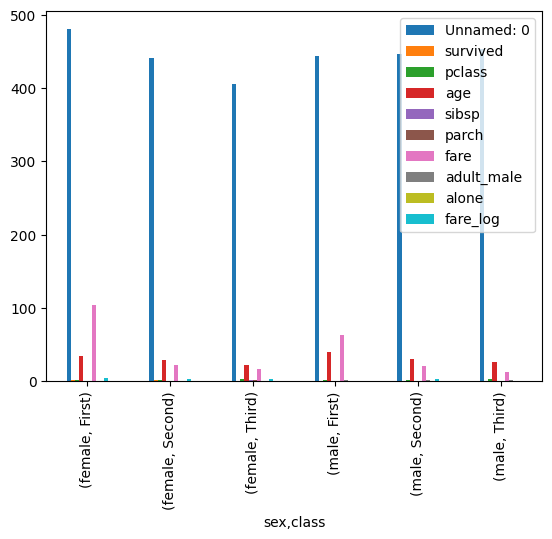

In [43]:
kashti_cleandata.groupby(['sex', 'class']).mean().plot.bar()

# Relationship between data

In [44]:
# to check co relation
corr = kashti_cleandata.corr()
corr

C:\Users\stech\AppData\Local\Temp\ipykernel_7880\2183662708.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = kashti_cleandata.corr()


,Unnamed: 0,survived,pclass,age,sibsp,parch,fare,adult_male,alone,fare_log
Unnamed: 0,1.000000,0.027840,-0.032131,0.025923,-0.082835,-0.012943,-0.008860,0.018486,0.062496,-0.013245
survived,0.027840,1.000000,-0.356549,-0.074335,-0.014483,0.095426,0.273531,-0.554567,-0.201175,0.334877
pclass,-0.032131,-0.356549,1.000000,-0.365121,0.061354,0.022519,-0.617591,0.102930,0.156030,-0.766373
age,0.025923,-0.074335,-0.365121,1.000000,-0.308906,-0.186271,0.103100,0.275035,0.187284,0.131457
sibsp,-0.082835,-0.014483,0.061354,-0.308906,1.000000,0.381803,0.197954,-0.311622,-0.629200,0.321417
parch,-0.012943,0.095426,0.022519,-0.186271,0.381803,1.000000,0.259948,-0.366540,-0.574701,0.340691
fare,-0.008860,0.273531,-0.617591,0.103100,0.197954,0.259948,1.000000,-0.228675,-0.333949,0.868301
adult_male,0.018486,-0.554567,0.102930,0.275035,-0.311622,-0.366540,-0.228675,1.000000,0.402214,-0.304249
alone,0.062496,-0.201175,0.156030,0.187284,-0.629200,-0.574701,-0.333949,0.402214,1.000000,-0.497267
fare_log,-0.013245,0.334877,-0.766373,0.131457,0.321417,0.340691,0.868301,-0.304249,-0.497267,1.000000


<AxesSubplot: >

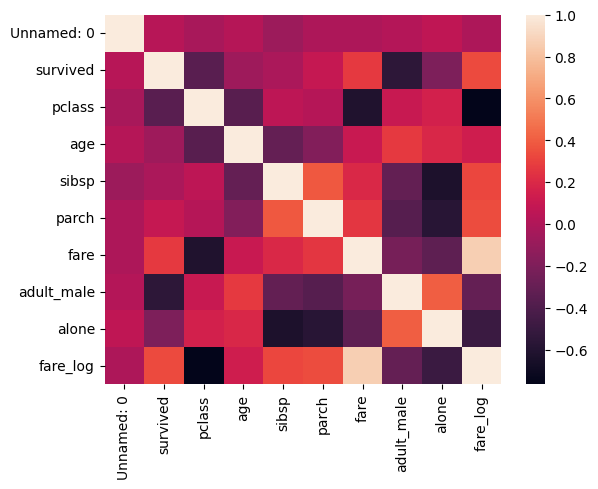

In [45]:
# heatmap graph of co relation
sns.heatmap(corr)

<AxesSubplot: >

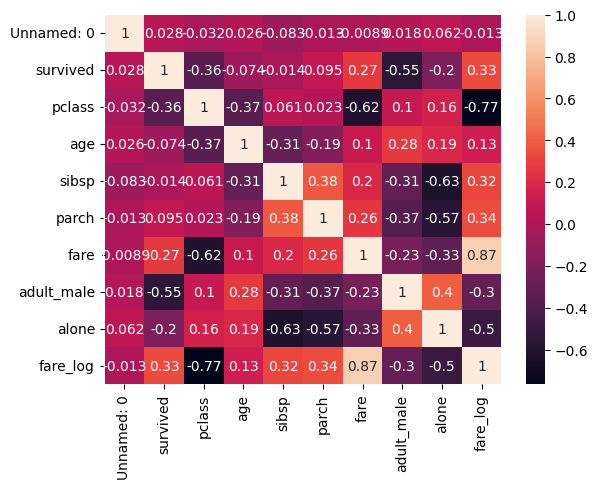

In [46]:
# if you want to see values 
sns.heatmap(corr, annot=True)

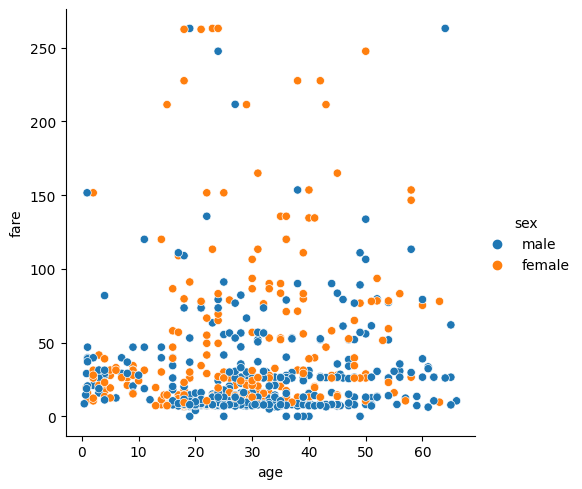

In [47]:
sns.relplot(x='age', y='fare', hue='sex', data=kashti_cleandata)

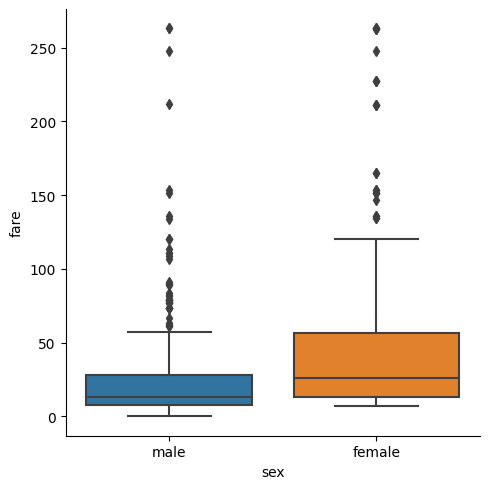

In [48]:
sns.catplot(x='sex', y='fare', data=kashti_cleandata, kind='box')

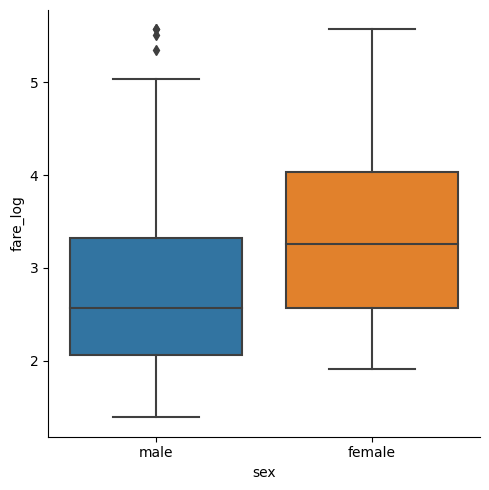

In [49]:
sns.catplot(x='sex', y='fare_log', data=kashti_cleandata, kind='box')

# Statistic Week (Day-17)
- alpha and p value:

In conducting a test of significance or hypothesis test, there are two numbers that are easy to get confused. These numbers are easily confused because they are both numbers between zero and one, and are both probabilities. One number is called the p-value of the test statistic. The other number of interest is the level of significance or alpha.

determine if an observed outcome is statistically significant, we compare the values of alpha and the p-value. There are two possibilities that emerge:

- The p-value is less than or equal to alpha. In this case, we reject the null hypothesis. When this happens, we say that the result is statistically significant. In other words, we are reasonably sure that there is something besides chance alone that gave us an observed sample.
- The p-value is greater than alpha. In this case, we fail to reject the null hypothesis. When this happens, we say that the result is not statistically significant. In other words, we are reasonably sure that our observed data can be explained by chance alone.

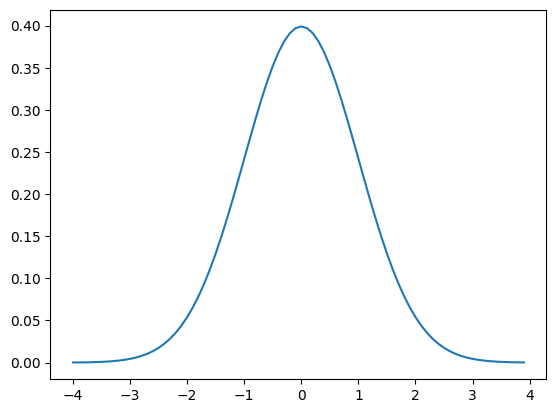

In [50]:
# this is how you show normal distribution (bell curve)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x_axis  = np.arange(-4, 4, 0.1)
plt.plot(x_axis, norm.pdf(x_axis, 0, 1))

# Statistic Week (Day-18)
1. Shapiro Wilk Test
    - Tests wether a data sample has Gaussian Distribution (Normal Distribution)

Assumptions
1. Observations in each sample are independent and identically distributed (iid)
2. Interpretation
  
- HO (Null Hypothesis): the sample a gaussian/normal distribution
- H1 (ALternative Hypothesis): the sample does not have normal/gaussian distribution

In [51]:
from scipy.stats import shapiro
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
shapiro(data)

ShapiroResult(statistic=0.8951010704040527, pvalue=0.1934097558259964)

In [52]:
# example of shapiro wilk normality test
from scipy.stats import shapiro
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('The data is normal')
else:
    print('The data is not normal')

stat=0.895, p=0.193
The data is normal


<AxesSubplot: xlabel='age'>

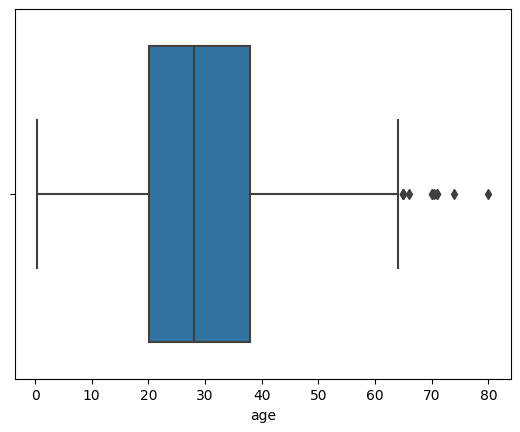

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

titanic = sns.load_dataset('titanic')

# titanic['age'].hist()
sns.boxplot(x=titanic['age'])

In [54]:
# Adapting the above code but doesn't work this way
from scipy.stats import shapiro
stat, p = shapiro(titanic['age'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('The data is normal')
else:
    print('The data is not normal')

stat=nan, p=1.000
The data is normal


In [55]:
# Normality Test
from scipy.stats import shapiro
titanic = titanic.dropna()
stat, p = shapiro(titanic['age'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('The data is normal')
else:
    print('The data is not normal')

stat=0.991, p=0.284
The data is normal


<AxesSubplot: xlabel='age'>

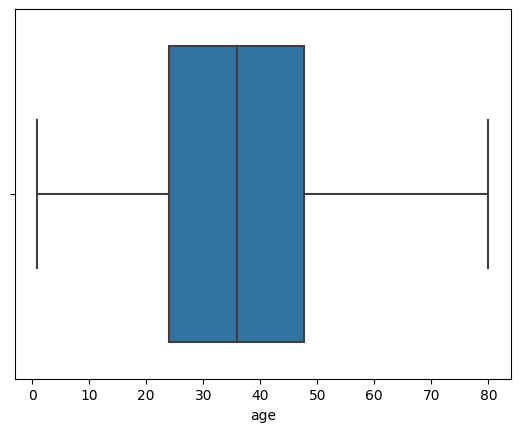

In [56]:
# we can clearly see the difference
sns.boxplot(x=titanic['age'])

In [57]:
from scipy.stats import shapiro
stat, p = shapiro(titanic['fare'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('The data is normal')
else:
    print('The data is not normal')

stat=0.743, p=0.000
The data is not normal


<AxesSubplot: xlabel='fare'>

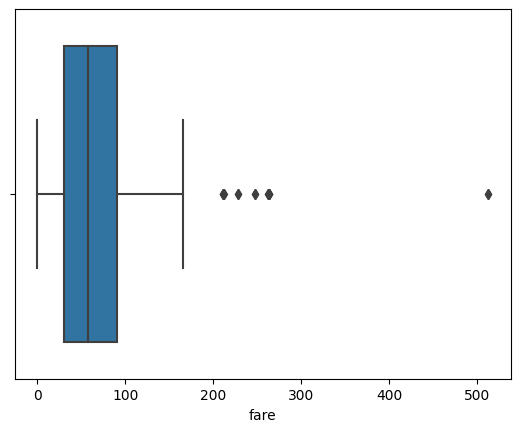

In [58]:
sns.boxplot(x=titanic['fare'])

# Correlation Test

### 1. Pearson's Correlation Coeffecient
Tests wether two samples have a linear relationship

**Assumptions**
1. Observations in each sample are independent and identically ddistributed (iid)
2. Observations in each sample are normally distributed
3. Observations in each sample have the same variance
4. Interpretation

- HO (Null Hypothesis): two samples are independent
- H1 (ALternative Hypothesis): there is dependency between samples

In [59]:
# Example of Pearson's Correlation Test
from scipy.stats import pearsonr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.688, p=0.028
Probably dependent


In [60]:
# we can implement it on our own data frame
from scipy.stats import pearsonr
stat, p = pearsonr(titanic['age'], titanic['fare'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=-0.091, p=0.223
Probably independent


### 2. Spearman's Rank Correlation
Tests wether two samples have monotonic relationship

**Assumptions**
1. Observations in each sample are independent and identically ddistributed (iid)
2. Observations in each sample can be ranked
3. Interpretation

- HO (Null Hypothesis): two samples are independent
- H1 (ALternative Hypothesis): there is dependency between samples

In [61]:
# Example of Spearman's Rank Correlation Test
from scipy.stats import spearmanr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.688, p=0.028
Probably dependent


### 3. Chi-Squared Test
Tests whether two categoric variables are related or independent

**Assumptions**
1. Observations used in calculations of the contingency table are independent
2. 25 or more examples in each cell of the contingency table.
3. Interpretation

- HO (Null Hypothesis): two samples are independent
- H1 (ALternative Hypothesis): there is dependency between samples

In [62]:
# Example of Chi-Squared Test
from scipy.stats import chi2_contingency
table = [[10, 20, 30], [6, 9, 17]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f, dof=%.3f' % (stat, p, dof))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.272, p=0.873, dof=2.000
Probably independent


# Parametric Statistical Hypothesis Tests

### 1. Student T- Test
Tests whether the means of two independent samples are significally different

**Assumptions**
1. Observations in each sample are independent and identically ddistributed (iid)
2. Observations in each sample are normally distributed
3. Observations in each sample have the same variance
4. Doesn't Matter if length of data sets is equal or not
5. Interpretation

- HO (Null Hypothesis): the means of the sample are equal
- H1 (ALternative Hypothesis): the means of the sample are unequal

In [63]:
# Example of Student T-Test
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=-0.326, p=0.748
Probably the same distribution


### 2. Paired Student’s t-test
Tests whether the means of two paired samples are significantly different.

**Assumptions**
1. Observations in each sample are independent and identically distributed (iid).
2. Observations in each sample are normally distributed.
3. Observations in each sample have the same variance.
4. Observations across each sample are paired.
5. Length should be equal of data sets
6. Interpretation

* H0: the means of the samples are equal.
* H1: the means of the samples are unequal.

In [64]:
# Example of the Paired Student's t-test
from scipy.stats import ttest_rel
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-0.334, p=0.746
Probably the same distribution


### 4. Analysis of Variance Test (ANOVA)
Tests whether the means of two or more independent samples are significantly different.

**Assumptions**
1. Observations in each sample are independent and identically distributed (iid).
2. Observations in each sample are normally distributed.
3. Observations in each sample have the same variance.
4. Interpretation

* H0: the means of the samples are equal.
* H1: one or more of the means of the samples are unequal.

In [65]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.096, p=0.908
Probably the same distribution


- there are also some post hoc tests.
- the above tests conclude the whole result using three data sets
- but the post hoc tests gives us the difference between data1 and data2 same as data2 and data3 